In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pickle
from sklearn.metrics import f1_score

num_genes = 50

## 1,281 genes (core iCD signature) that were differentially expressed (fold change ≥ 1.5) between 2 independent iCD and Ctl groups.

In [2]:
core = pd.read_csv('core_icd.csv')
core.rename(columns={'Gene ID':'Gene_ID'}, inplace=True)
# core = core[core['Gene_ID'].apply(lambda x: str(x).isdigit())]
# core = core[core.Gene_ID.astype(int).isin(dataset.Gene_ID.astype(int))]
# core = core[core['Gene_ID'].apply(lambda x: isinstance(x, int))]
core

,Gene_ID,Gene Symbol,iCD-1 vs Ctl Fold change >= 1.5,Log FC (iCD-1 vs Ctl),iCD-2 vs Ctl Fold change >= 1.5,Log FC (iCD-2 vs Ctl )
0,405753,DUOXA2,34.267,5.099,51.931,5.699
1,4314,MMP3,21.431,4.422,29.681,4.891
2,366,AQP9,21.243,4.409,32.809,5.036
3,3576,IL8,18.578,4.216,27.838,4.799
4,50506,DUOX2,15.849,3.986,19.216,4.264
...,...,...,...,...,...,...
1276,338094,FAM151A,-9.422,-3.236,-8.349,-3.062
1277,8029,CUBN,-9.435,-3.238,-6.882,-2.783
1278,64902,AGXT2,-10.177,-3.347,-6.692,-2.742
1279,9027,NAT8,-10.575,-3.403,-6.818,-2.769


In [3]:
core = core.sort_values(["Log FC (iCD-1 vs Ctl)"], ascending=False)
core.head(60)


,Gene_ID,Gene Symbol,iCD-1 vs Ctl Fold change >= 1.5,Log FC (iCD-1 vs Ctl),iCD-2 vs Ctl Fold change >= 1.5,Log FC (iCD-2 vs Ctl )
0,405753,DUOXA2,34.267,5.099,51.931,5.699
1,4314,MMP3,21.431,4.422,29.681,4.891
2,366,AQP9,21.243,4.409,32.809,5.036
3,3576,IL8,18.578,4.216,27.838,4.799
4,50506,DUOX2,15.849,3.986,19.216,4.264
5,5225,PGC,15.305,3.936,11.905,3.574
6,7130,TNFAIP6,14.449,3.853,11.673,3.545
7,6374,CXCL5,14.101,3.818,13.939,3.801
8,1116,CHI3L1,13.731,3.779,8.139,3.025
9,5008,OSM,13.279,3.731,16.396,4.035


In [4]:
icd1 = pd.concat([core.head(num_genes), core.tail(num_genes)])

icd1

,Gene_ID,Gene Symbol,iCD-1 vs Ctl Fold change >= 1.5,Log FC (iCD-1 vs Ctl),iCD-2 vs Ctl Fold change >= 1.5,Log FC (iCD-2 vs Ctl )
0,405753,DUOXA2,34.267,5.099,51.931,5.699
1,4314,MMP3,21.431,4.422,29.681,4.891
2,366,AQP9,21.243,4.409,32.809,5.036
3,3576,IL8,18.578,4.216,27.838,4.799
4,50506,DUOX2,15.849,3.986,19.216,4.264
...,...,...,...,...,...,...
1276,338094,FAM151A,-9.422,-3.236,-8.349,-3.062
1277,8029,CUBN,-9.435,-3.238,-6.882,-2.783
1278,64902,AGXT2,-10.177,-3.347,-6.692,-2.742
1279,9027,NAT8,-10.575,-3.403,-6.818,-2.769


In [5]:
core = core.sort_values(["Log FC (iCD-2 vs Ctl )"], ascending=False)
core

,Gene_ID,Gene Symbol,iCD-1 vs Ctl Fold change >= 1.5,Log FC (iCD-1 vs Ctl),iCD-2 vs Ctl Fold change >= 1.5,Log FC (iCD-2 vs Ctl )
0,405753,DUOXA2,34.267,5.099,51.931,5.699
2,366,AQP9,21.243,4.409,32.809,5.036
1,4314,MMP3,21.431,4.422,29.681,4.891
3,3576,IL8,18.578,4.216,27.838,4.799
10,3577,CXCR1,12.230,3.612,19.625,4.295
...,...,...,...,...,...,...
1273,1271,CNTFR,-8.546,-3.095,-6.979,-2.803
1266,169693,C9orf71,-6.858,-2.778,-7.636,-2.933
1272,2538,G6PC,-8.011,-3.002,-7.651,-2.936
1275,9153,SLC28A2,-9.219,-3.205,-8.322,-3.057


## 200 most differentially expressed genes between CD1, CD2 and control

In [6]:
icd2 = pd.concat([core.head(num_genes), core.tail(num_genes)])

icd2

,Gene_ID,Gene Symbol,iCD-1 vs Ctl Fold change >= 1.5,Log FC (iCD-1 vs Ctl),iCD-2 vs Ctl Fold change >= 1.5,Log FC (iCD-2 vs Ctl )
0,405753,DUOXA2,34.267,5.099,51.931,5.699
2,366,AQP9,21.243,4.409,32.809,5.036
1,4314,MMP3,21.431,4.422,29.681,4.891
3,3576,IL8,18.578,4.216,27.838,4.799
10,3577,CXCR1,12.230,3.612,19.625,4.295
...,...,...,...,...,...,...
1273,1271,CNTFR,-8.546,-3.095,-6.979,-2.803
1266,169693,C9orf71,-6.858,-2.778,-7.636,-2.933
1272,2538,G6PC,-8.011,-3.002,-7.651,-2.936
1275,9153,SLC28A2,-9.219,-3.205,-8.322,-3.057


In [7]:
hundred = pd.concat([icd1, icd2])
hundred.shape

(200, 6)

In [8]:
hundred.Gene_ID

0       405753
1         4314
2          366
3         3576
4        50506
         ...  
1273      1271
1266    169693
1272      2538
1275      9153
1276    338094
Name: Gene_ID, Length: 200, dtype: object

In [9]:
hundred.rename(columns={'Gene Symbol':'Gene_Symbol'}, inplace=True)
hundred

,Gene_ID,Gene_Symbol,iCD-1 vs Ctl Fold change >= 1.5,Log FC (iCD-1 vs Ctl),iCD-2 vs Ctl Fold change >= 1.5,Log FC (iCD-2 vs Ctl )
0,405753,DUOXA2,34.267,5.099,51.931,5.699
1,4314,MMP3,21.431,4.422,29.681,4.891
2,366,AQP9,21.243,4.409,32.809,5.036
3,3576,IL8,18.578,4.216,27.838,4.799
4,50506,DUOX2,15.849,3.986,19.216,4.264
...,...,...,...,...,...,...
1273,1271,CNTFR,-8.546,-3.095,-6.979,-2.803
1266,169693,C9orf71,-6.858,-2.778,-7.636,-2.933
1272,2538,G6PC,-8.011,-3.002,-7.651,-2.936
1275,9153,SLC28A2,-9.219,-3.205,-8.322,-3.057


## RISK dataset of control, CD no deep ulcer, CD deep ulcer, UC patients

In [10]:
dataset = pd.read_csv('risk.csv')
# gene_symbol = dataset.pop("Gene Symbol")
dataset.rename(columns={'Gene ID':'Gene_ID', 'Gene Symbol':'Gene_Symbol'}, inplace=True)
# gene_id = dataset.pop("Gene ID")
dataset

,Gene_ID,Gene_Symbol,CCFA_Risk_001,CCFA_Risk_002,CCFA_Risk_003,CCFA_Risk_004,CCFA_Risk_005,CCFA_Risk_006,CCFA_Risk_007,CCFA_Risk_008,...,CCFA_Risk_089,CCFA_Risk_090,CCFA_Risk_117,CCFA_Risk_118,CCFA_Risk_121,CCFA_Risk_180,CCFA_Risk_114,CCFA_Risk_139,CCFA_Risk_237,CCFA_Risk_257
0,1,A1BG,-0.53931,1.31210,-0.083781,-0.86227,0.74121,0.72868,0.79123,-0.44062,...,-1.20180,-0.208140,-0.221770,-1.67290,-0.002418,0.569290,0.81253,0.61751,0.150020,0.039876
1,2,A2M,0.79561,1.12940,0.602470,0.81323,0.80724,0.47415,0.38337,0.57451,...,-0.41766,0.233700,0.155220,-0.24888,-0.049269,-0.048866,-0.16492,1.06890,-0.224290,0.232120
2,3,A2MP1,-0.20249,-0.20249,-0.202490,-0.20249,-0.20249,0.10892,-0.20249,-0.20249,...,0.43514,1.932800,2.077500,-0.20249,0.184890,2.437500,-0.20249,1.47860,0.089707,-0.202490
3,9,NAT1,1.02630,-0.65959,1.291500,0.19540,-0.39078,1.09460,-0.21672,0.36204,...,0.16248,0.372190,-0.019795,0.19675,0.392790,0.112410,-0.34924,-0.30852,0.606460,0.173880
4,10,NAT2,0.24641,-7.72410,-0.542870,0.39032,-4.82710,-0.58034,-1.78130,-0.16412,...,0.69774,0.008138,0.013065,0.70364,-0.229340,-0.216230,0.41874,-2.34260,0.000504,-0.296990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36367,100653021,LOC100653021,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000
36368,100653022,PP12719,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000
36369,100653023,LOC100653023,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000
36370,100653024,LOC100653024,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000


### Match patient IDs with symptoms

In [11]:
full_ids = np.array(dataset.columns)[2:]
len(full_ids)

322

In [12]:
# find order of patients in dataset
patient_ids = np.array([int(i[-3:].lstrip("0"))-1 for i in full_ids])
patient_ids

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,  11,  12,  14,  15,
        16,  19,  20,  21,  22,  23,  24,  26,  28,  29,  31,  36,  39,
        42,  44,  45,  46,  47,  48,  49,  50,  51,  52,  55,  56,  57,
        58,  59,  60,  61,  62,  65,  67,  68,  69,  70,  72,  73,  74,
        90,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 114, 115, 119, 131,
       132, 133, 134, 135, 136, 137, 139, 140, 141, 142, 144, 145, 146,
       147, 148, 149, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164,
       165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177,
       178, 180, 181, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192,
       193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205,
       206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218,
       219, 220, 221, 222, 223, 224, 226, 227, 228, 229, 230, 235, 251,
       252, 253, 254, 255, 257, 258, 259, 260, 261, 262, 263, 26

In [13]:


with open('sample_titles.txt') as f:
    lines = f.read()

patients = np.array(lines.split("\t"))
num_patients = len(patients)
print(num_patients, "patients")
patients

322 patients


array(['"CD Female with Macroscopic inflammation and No Deep Ulcer (CCFA_Risk_001)"',
       '"CD Male with Macroscopic inflammation and No Deep Ulcer (CCFA_Risk_002)"',
       '"CD Female with Macroscopic inflammation and No Deep Ulcer (CCFA_Risk_003)"',
       '"CD Male with Macroscopic inflammation and No Deep Ulcer (CCFA_Risk_004)"',
       '"CD Female with Macroscopic inflammation and No Deep Ulcer (CCFA_Risk_005)"',
       '"CD Female with Macroscopic inflammation and Deep Ulcer (CCFA_Risk_006)"',
       '"CD Male with Macroscopic inflammation and No Deep Ulcer (CCFA_Risk_007)"',
       '"CD Male with No Microscopic or Macroscopic inflammation and No Deep Ulcer (CCFA_Risk_008)"',
       '"CD Female with Macroscopic inflammation and No Deep Ulcer (CCFA_Risk_009)"',
       '"Not IBD Male (CCFA_Risk_010)"', '"Not IBD Male (CCFA_Risk_011)"',
       '"CD Female with Microscopic inflammation and No Deep Ulcer (CCFA_Risk_012)"',
       '"CD Male with Macroscopic inflammation and No Deep

In [14]:


def classify(x):
    if "Not IBD" in x: # control
#         print(x)
        return 0
    elif "CD " in x and "No Deep Ulcer " in x: # Crohn's Disease no deep ulcer
        return 1
    elif "CD " in x: # Crohn's Disease deep ulcer
#         print(x)
        return 2
    else:
#         print(x)
        return 3 # Ulcerative Collitis

vec = np.vectorize(classify)

disease_labels = vec(patients)[patient_ids]
disease_labels

array([1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 2, 2, 1, 1, 2, 1,
       1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2,
       1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 0, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2,
       2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2,
       1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2,
       2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2,
       2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 3, 2, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 2, 3, 1, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [15]:
UC = disease_labels == 3

CD_no_ulcer = disease_labels == 1 
CD_ulcer = disease_labels == 2
CD = CD_no_ulcer | CD_ulcer
control = disease_labels == 0


In [16]:
def get_label(disease_id):
    if disease_id == 0:
        return "_control"
    elif disease_id == 1:
        return "_CD_plain"
    elif disease_id == 2:
        return "_CD_deep_ulcer"
    else:
        return "_UC"

symptom_IDs = list((patient_ids+1).astype('str'))
    
for i in range(len(disease_labels)):
    d = disease_labels[i]
    label = get_label(d)
    symptom_IDs[i] += label
    
    
    
        

In [17]:


symptom_IDs = np.array(symptom_IDs).astype('str')
symptom_IDs

array(['1_CD_plain', '2_CD_plain', '3_CD_plain', '4_CD_plain',
       '5_CD_plain', '6_CD_deep_ulcer', '7_CD_plain', '8_CD_plain',
       '9_CD_plain', '12_CD_plain', '13_CD_plain', '15_CD_plain',
       '16_CD_plain', '17_CD_deep_ulcer', '20_control',
       '21_CD_deep_ulcer', '22_CD_deep_ulcer', '23_CD_deep_ulcer',
       '24_CD_plain', '25_CD_plain', '27_CD_deep_ulcer', '29_CD_plain',
       '30_CD_plain', '32_CD_plain', '37_CD_deep_ulcer', '40_CD_plain',
       '43_CD_plain', '45_CD_plain', '46_CD_deep_ulcer', '47_CD_plain',
       '48_CD_deep_ulcer', '49_CD_deep_ulcer', '50_CD_deep_ulcer',
       '51_CD_deep_ulcer', '52_CD_plain', '53_CD_plain', '56_CD_plain',
       '57_CD_plain', '58_CD_plain', '59_CD_deep_ulcer', '60_CD_plain',
       '61_CD_plain', '62_CD_deep_ulcer', '63_CD_deep_ulcer',
       '66_CD_plain', '68_CD_plain', '69_CD_deep_ulcer',
       '70_CD_deep_ulcer', '71_CD_plain', '73_CD_plain', '74_CD_plain',
       '75_CD_deep_ulcer', '91_CD_plain', '93_CD_deep_ulcer',


In [18]:
UC_cols = symptom_IDs[UC]
# UC_cols
CD_cols = symptom_IDs[CD]
control_cols = symptom_IDs[control]
control_cols

array(['20_control', '120_control', '10_control', '11_control',
       '14_control', '19_control', '28_control', '31_control',
       '33_control', '34_control', '35_control', '36_control',
       '38_control', '39_control', '41_control', '42_control',
       '44_control', '54_control', '55_control', '64_control',
       '65_control', '67_control', '72_control', '76_control',
       '77_control', '78_control', '79_control', '80_control',
       '81_control', '82_control', '83_control', '84_control',
       '85_control', '86_control', '87_control', '88_control',
       '89_control', '90_control', '117_control', '118_control',
       '121_control', '180_control'], dtype='<U17')

In [19]:
gene_cols = np.array(dataset.columns[:2])
new_headers = np.concatenate([gene_cols, symptom_IDs], axis=0)
dataset.columns = new_headers

In [20]:
dataset

,Gene_ID,Gene_Symbol,1_CD_plain,2_CD_plain,3_CD_plain,4_CD_plain,5_CD_plain,6_CD_deep_ulcer,7_CD_plain,8_CD_plain,...,89_control,90_control,117_control,118_control,121_control,180_control,114_UC,139_CD_deep_ulcer,237_CD_plain,257_CD_deep_ulcer
0,1,A1BG,-0.53931,1.31210,-0.083781,-0.86227,0.74121,0.72868,0.79123,-0.44062,...,-1.20180,-0.208140,-0.221770,-1.67290,-0.002418,0.569290,0.81253,0.61751,0.150020,0.039876
1,2,A2M,0.79561,1.12940,0.602470,0.81323,0.80724,0.47415,0.38337,0.57451,...,-0.41766,0.233700,0.155220,-0.24888,-0.049269,-0.048866,-0.16492,1.06890,-0.224290,0.232120
2,3,A2MP1,-0.20249,-0.20249,-0.202490,-0.20249,-0.20249,0.10892,-0.20249,-0.20249,...,0.43514,1.932800,2.077500,-0.20249,0.184890,2.437500,-0.20249,1.47860,0.089707,-0.202490
3,9,NAT1,1.02630,-0.65959,1.291500,0.19540,-0.39078,1.09460,-0.21672,0.36204,...,0.16248,0.372190,-0.019795,0.19675,0.392790,0.112410,-0.34924,-0.30852,0.606460,0.173880
4,10,NAT2,0.24641,-7.72410,-0.542870,0.39032,-4.82710,-0.58034,-1.78130,-0.16412,...,0.69774,0.008138,0.013065,0.70364,-0.229340,-0.216230,0.41874,-2.34260,0.000504,-0.296990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36367,100653021,LOC100653021,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000
36368,100653022,PP12719,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000
36369,100653023,LOC100653023,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000
36370,100653024,LOC100653024,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000


# Crohn's disease analysis

In [21]:
CD_df = dataset.drop(UC_cols, axis=1)
CD_df

,Gene_ID,Gene_Symbol,1_CD_plain,2_CD_plain,3_CD_plain,4_CD_plain,5_CD_plain,6_CD_deep_ulcer,7_CD_plain,8_CD_plain,...,88_control,89_control,90_control,117_control,118_control,121_control,180_control,139_CD_deep_ulcer,237_CD_plain,257_CD_deep_ulcer
0,1,A1BG,-0.53931,1.31210,-0.083781,-0.86227,0.74121,0.72868,0.79123,-0.44062,...,-0.478240,-1.20180,-0.208140,-0.221770,-1.67290,-0.002418,0.569290,0.61751,0.150020,0.039876
1,2,A2M,0.79561,1.12940,0.602470,0.81323,0.80724,0.47415,0.38337,0.57451,...,-0.247400,-0.41766,0.233700,0.155220,-0.24888,-0.049269,-0.048866,1.06890,-0.224290,0.232120
2,3,A2MP1,-0.20249,-0.20249,-0.202490,-0.20249,-0.20249,0.10892,-0.20249,-0.20249,...,1.526900,0.43514,1.932800,2.077500,-0.20249,0.184890,2.437500,1.47860,0.089707,-0.202490
3,9,NAT1,1.02630,-0.65959,1.291500,0.19540,-0.39078,1.09460,-0.21672,0.36204,...,0.640220,0.16248,0.372190,-0.019795,0.19675,0.392790,0.112410,-0.30852,0.606460,0.173880
4,10,NAT2,0.24641,-7.72410,-0.542870,0.39032,-4.82710,-0.58034,-1.78130,-0.16412,...,0.039076,0.69774,0.008138,0.013065,0.70364,-0.229340,-0.216230,-2.34260,0.000504,-0.296990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36367,100653021,LOC100653021,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000
36368,100653022,PP12719,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000
36369,100653023,LOC100653023,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000
36370,100653024,LOC100653024,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000


In [22]:
# select_all = dataset[dataset.Gene_ID.astype(str).isin(hundred.Gene_ID.astype(str))]
# CD_df.Gene_Symbol.astype(str).isin(hundred.Gene_Symbol.astype(str)) & CD_df["1_CD_plain"] < 0

In [23]:
random_sample = CD_df.iloc[CD_df.sample(100).index,:]


In [24]:
select_hundred = CD_df[CD_df.Gene_Symbol.astype(str).isin(hundred.Gene_Symbol.astype(str))]
select_hundred.Gene_Symbol.values

array(['AADAC', 'APOA1', 'APOA4', 'APOB', 'APOC3', 'AQP9', 'C6',
       'CEACAM7', 'CHI3L1', 'ABCC2', 'CNTFR', 'CRIP1', 'CSF3', 'CYP3A7',
       'CYP3A4', 'FABP6', 'FCGR1A', 'FCGR1B', 'FCGR3A', 'FCGR3B', 'FCN1',
       'FMO1', 'FOLH1', 'FPR1', 'FPR2', 'G6PC', 'CXCL3', 'GSTA1', 'GSTA2',
       'GUCA2B', 'HMGCS2', 'IL1B', 'IL1RN', 'IL8', 'CXCR1', 'ITIH3',
       'KCNJ15', 'LCN2', 'LCT', 'MEP1B', 'CXCL9', 'MMP1', 'MMP3', 'MMP7',
       'MMP10', 'MUC1', 'OSM', 'PGC', 'PNLIPRP2', 'S100A8', 'S100A9',
       'S100A12', 'SAA1', 'SAA2', 'CXCL11', 'CXCL5', 'SELE', 'SFRP5',
       'SHBG', 'SLC6A4', 'SLC10A2', 'SLC11A1', 'SLC13A1', 'TCN1',
       'TM4SF4', 'TNFAIP6', 'XPNPEP2', 'CUBN', 'SOAT2', 'CYP4F2', 'FCN3',
       'HCAR3', 'ALDH1A2', 'MGAM', 'NAT8', 'CLDN8', 'SLC28A2', 'SLC28A1',
       'LRAT', 'LAMC3', 'SLC6A14', 'CLEC5A', 'DHDH', 'DUOX2', 'NAT8B',
       'TREM1', 'UGT1A6', 'SUSD2', 'CYP4F11', 'PROK2', 'AGXT2', 'FRMD1',
       'CDHR1', 'OTOP2', 'BPIFB1', 'LYPD1', 'CPO', 'SLC34A3', 'SLC23A3',

In [25]:

select_hundred = pd.concat([select_hundred, random_sample]).drop_duplicates()
select_hundred.pop("Gene_ID")
select_hundred = select_hundred.set_index("Gene_Symbol")
select_hundred
# select_hundred = select_hundred[:-1]

,1_CD_plain,2_CD_plain,3_CD_plain,4_CD_plain,5_CD_plain,6_CD_deep_ulcer,7_CD_plain,8_CD_plain,9_CD_plain,12_CD_plain,...,88_control,89_control,90_control,117_control,118_control,121_control,180_control,139_CD_deep_ulcer,237_CD_plain,257_CD_deep_ulcer
Gene_Symbol,,,,,,,,,,,,,,,,,,,,,
AADAC,-0.881250,-8.38590,-3.47650,0.47600,-6.86090,-3.757300,-4.744800,-0.044202,-2.506500,0.006241,...,-1.031600,1.162300,0.199200,0.23903,1.36150,-0.934720,-0.248440,-5.22890,-0.680680,-1.48990
APOA1,-3.046500,-9.36170,-2.63630,0.93493,-6.47840,-5.871500,-9.417700,-0.653090,-4.268600,-0.835050,...,-0.569040,0.744860,0.200140,-0.15932,1.05160,-1.207500,-1.068500,-7.45590,0.396090,-2.94530
APOA4,-0.918130,-7.16960,-2.64860,0.19887,-7.48180,-3.041400,-7.560500,-0.947140,-1.662300,-0.893450,...,-0.829470,0.546240,0.532340,-0.29898,0.26538,-0.071699,-1.206200,-6.29720,0.225200,-1.91980
APOB,-1.312800,-7.41580,-2.54120,1.91080,-7.06560,-3.729600,-6.837700,0.335400,-3.110900,-0.016976,...,-0.000025,1.025300,0.417150,0.14618,1.01690,0.075990,-0.442670,-5.48050,-0.043606,-2.89930
APOC3,-1.277500,-8.08800,-2.16910,0.80647,-7.22960,-3.867300,-8.254200,-0.466340,-1.608800,-0.302970,...,-0.581970,0.590720,0.047763,-0.39229,0.53516,-0.996560,-1.302900,-7.37030,0.002768,-1.89160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RSL24D1P1,0.000000,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.00000,0.000000,0.00000
MIEN1,0.048895,-0.13047,0.16749,-0.26901,-0.43410,-0.001796,-0.642020,0.007044,0.002349,-0.356140,...,0.008968,0.265660,-0.075956,0.00660,0.42261,-0.100730,-0.365170,-0.33844,0.009232,-0.10076
PCBP1_AS1,-1.101700,0.12465,-0.81007,-0.47922,-0.86561,0.011933,-0.019921,0.073880,-0.322260,-0.400690,...,-0.142800,-0.010798,-0.173880,0.38871,0.24453,0.044674,0.055407,-0.23596,-0.090641,-0.53052


In [26]:
for n in select_hundred.index.values:
    if n == "FER1L4":
        print("yes")
select_hundred.index.values

array(['AADAC', 'APOA1', 'APOA4', 'APOB', 'APOC3', 'AQP9', 'C6',
       'CEACAM7', 'CHI3L1', 'ABCC2', 'CNTFR', 'CRIP1', 'CSF3', 'CYP3A7',
       'CYP3A4', 'FABP6', 'FCGR1A', 'FCGR1B', 'FCGR3A', 'FCGR3B', 'FCN1',
       'FMO1', 'FOLH1', 'FPR1', 'FPR2', 'G6PC', 'CXCL3', 'GSTA1', 'GSTA2',
       'GUCA2B', 'HMGCS2', 'IL1B', 'IL1RN', 'IL8', 'CXCR1', 'ITIH3',
       'KCNJ15', 'LCN2', 'LCT', 'MEP1B', 'CXCL9', 'MMP1', 'MMP3', 'MMP7',
       'MMP10', 'MUC1', 'OSM', 'PGC', 'PNLIPRP2', 'S100A8', 'S100A9',
       'S100A12', 'SAA1', 'SAA2', 'CXCL11', 'CXCL5', 'SELE', 'SFRP5',
       'SHBG', 'SLC6A4', 'SLC10A2', 'SLC11A1', 'SLC13A1', 'TCN1',
       'TM4SF4', 'TNFAIP6', 'XPNPEP2', 'CUBN', 'SOAT2', 'CYP4F2', 'FCN3',
       'HCAR3', 'ALDH1A2', 'MGAM', 'NAT8', 'CLDN8', 'SLC28A2', 'SLC28A1',
       'LRAT', 'LAMC3', 'SLC6A14', 'CLEC5A', 'DHDH', 'DUOX2', 'NAT8B',
       'TREM1', 'UGT1A6', 'SUSD2', 'CYP4F11', 'PROK2', 'AGXT2', 'FRMD1',
       'CDHR1', 'OTOP2', 'BPIFB1', 'LYPD1', 'CPO', 'SLC34A3', 'SLC23A3',

### 118 matches with RISK dataset, plus random sample of 100

In [27]:
select_hundred

,1_CD_plain,2_CD_plain,3_CD_plain,4_CD_plain,5_CD_plain,6_CD_deep_ulcer,7_CD_plain,8_CD_plain,9_CD_plain,12_CD_plain,...,88_control,89_control,90_control,117_control,118_control,121_control,180_control,139_CD_deep_ulcer,237_CD_plain,257_CD_deep_ulcer
Gene_Symbol,,,,,,,,,,,,,,,,,,,,,
AADAC,-0.881250,-8.38590,-3.47650,0.47600,-6.86090,-3.757300,-4.744800,-0.044202,-2.506500,0.006241,...,-1.031600,1.162300,0.199200,0.23903,1.36150,-0.934720,-0.248440,-5.22890,-0.680680,-1.48990
APOA1,-3.046500,-9.36170,-2.63630,0.93493,-6.47840,-5.871500,-9.417700,-0.653090,-4.268600,-0.835050,...,-0.569040,0.744860,0.200140,-0.15932,1.05160,-1.207500,-1.068500,-7.45590,0.396090,-2.94530
APOA4,-0.918130,-7.16960,-2.64860,0.19887,-7.48180,-3.041400,-7.560500,-0.947140,-1.662300,-0.893450,...,-0.829470,0.546240,0.532340,-0.29898,0.26538,-0.071699,-1.206200,-6.29720,0.225200,-1.91980
APOB,-1.312800,-7.41580,-2.54120,1.91080,-7.06560,-3.729600,-6.837700,0.335400,-3.110900,-0.016976,...,-0.000025,1.025300,0.417150,0.14618,1.01690,0.075990,-0.442670,-5.48050,-0.043606,-2.89930
APOC3,-1.277500,-8.08800,-2.16910,0.80647,-7.22960,-3.867300,-8.254200,-0.466340,-1.608800,-0.302970,...,-0.581970,0.590720,0.047763,-0.39229,0.53516,-0.996560,-1.302900,-7.37030,0.002768,-1.89160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RSL24D1P1,0.000000,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.00000,0.000000,0.00000
MIEN1,0.048895,-0.13047,0.16749,-0.26901,-0.43410,-0.001796,-0.642020,0.007044,0.002349,-0.356140,...,0.008968,0.265660,-0.075956,0.00660,0.42261,-0.100730,-0.365170,-0.33844,0.009232,-0.10076
PCBP1_AS1,-1.101700,0.12465,-0.81007,-0.47922,-0.86561,0.011933,-0.019921,0.073880,-0.322260,-0.400690,...,-0.142800,-0.010798,-0.173880,0.38871,0.24453,0.044674,0.055407,-0.23596,-0.090641,-0.53052


## Patient statistics

In [28]:
select_hundred.describe() 

,1_CD_plain,2_CD_plain,3_CD_plain,4_CD_plain,5_CD_plain,6_CD_deep_ulcer,7_CD_plain,8_CD_plain,9_CD_plain,12_CD_plain,...,88_control,89_control,90_control,117_control,118_control,121_control,180_control,139_CD_deep_ulcer,237_CD_plain,257_CD_deep_ulcer
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.129508,-0.393496,0.592860,-0.169239,-0.103682,0.079328,-0.593140,-0.042046,0.249170,0.240959,...,0.333316,-0.144643,0.234404,0.055662,-0.187318,0.364737,-0.055735,0.226050,0.553374,0.747722
std,2.850237,5.207108,3.873757,1.298521,4.707964,3.562811,3.817816,1.204140,3.176533,1.185747,...,1.376663,0.968154,0.743435,0.713898,1.135608,1.383555,0.948301,4.659182,1.939027,3.166125
min,-9.143700,-9.758000,-6.531400,-9.230500,-9.148200,-7.632200,-9.509100,-8.240300,-7.708600,-5.277600,...,-2.434800,-3.993500,-2.389000,-3.229700,-4.333800,-3.963600,-2.917300,-7.702300,-5.738000,-5.094500
25%,-1.363800,-4.992900,-2.541700,-0.401840,-4.242200,-3.028000,-4.243900,-0.364320,-2.108650,-0.104655,...,-0.321320,-0.304235,-0.089857,-0.096506,-0.580245,-0.262055,-0.536360,-3.823100,-0.286570,-1.542850
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.571100,1.258100,4.329750,0.380965,2.439800,2.627000,2.061550,0.241565,2.329100,0.570475,...,1.042950,0.406280,0.425375,0.316590,0.415715,0.663465,0.335945,3.958600,1.538300,3.309900
max,7.623300,10.885300,8.701100,2.611600,10.076100,8.476300,6.956900,6.284800,10.346600,5.072600,...,4.827000,2.110600,2.898600,2.354200,2.125900,4.953400,3.361200,10.961900,6.937200,8.431700


## Gene statistics

In [29]:
gene_stats = select_hundred.T.describe()
gene_stats

Gene_Symbol,AADAC,APOA1,APOA4,APOB,APOC3,AQP9,C6,CEACAM7,CHI3L1,ABCC2,...,TAF15,ZFYVE20,LOC100420253,LY6G5B,C5orf58,RSL24D1P1,MIEN1,PCBP1_AS1,LOC100133165,DNAJB8
count,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,...,260.000000,260.000000,260.0,260.000000,260.000000,260.0,260.000000,260.000000,260.0,260.000000
mean,-2.073628,-2.462062,-2.020175,-2.028195,-1.913645,4.358227,-2.521781,2.858556,2.848266,-1.878031,...,-0.086165,-0.135406,0.0,-0.270338,0.215822,0.0,0.098317,-0.036219,0.0,0.011683
std,2.427516,3.069309,2.701487,2.565986,2.857577,3.007303,2.023445,3.331058,2.591624,1.902136,...,0.248113,0.249870,0.0,0.870986,1.260704,0.0,0.469202,0.391950,0.0,0.134635
min,-10.494900,-11.447600,-10.607400,-9.719700,-10.273700,-1.915000,-5.177400,-2.534700,-3.544400,-6.706600,...,-0.875480,-0.869930,0.0,-4.190200,-2.045300,0.0,-0.958050,-1.131900,0.0,0.000000
25%,-3.579975,-4.570450,-3.400950,-3.232300,-3.256525,2.102800,-4.002025,0.583035,0.985918,-3.344950,...,-0.221490,-0.287712,0.0,-0.559763,-0.711222,0.0,-0.221400,-0.234580,0.0,0.000000
50%,-1.478150,-1.614000,-1.227100,-1.224000,-1.289700,4.718850,-2.809050,2.421700,2.834600,-1.587400,...,-0.103650,-0.123940,0.0,-0.041647,0.379190,0.0,0.024174,-0.011796,0.0,0.000000
75%,-0.245125,-0.165515,-0.125451,-0.136300,0.107045,6.450725,-1.280575,4.481425,4.604225,-0.405412,...,0.036779,0.015525,0.0,0.269907,1.041950,0.0,0.264827,0.191215,0.0,0.000000
max,2.245900,3.734600,2.430200,1.910800,3.344100,13.110300,4.510600,13.150200,8.169000,1.719800,...,1.278600,1.861100,0.0,1.052400,4.411000,0.0,1.630500,2.217800,0.0,1.760200


In [30]:
select_hundred.T

Gene_Symbol,AADAC,APOA1,APOA4,APOB,APOC3,AQP9,C6,CEACAM7,CHI3L1,ABCC2,...,TAF15,ZFYVE20,LOC100420253,LY6G5B,C5orf58,RSL24D1P1,MIEN1,PCBP1_AS1,LOC100133165,DNAJB8
1_CD_plain,-0.88125,-3.04650,-0.918130,-1.312800,-1.277500,6.32150,-3.50560,5.42790,3.30580,-1.70320,...,-0.438630,-0.217540,0.0,-1.977100,-2.04000,0.0,0.048895,-1.101700,0.0,0.0
2_CD_plain,-8.38590,-9.36170,-7.169600,-7.415800,-8.088000,9.67970,-5.17740,-0.42569,8.04170,-5.07250,...,-0.186170,0.217320,0.0,-1.064900,1.17820,0.0,-0.130470,0.124650,0.0,0.0
3_CD_plain,-3.47650,-2.63630,-2.648600,-2.541200,-2.169100,7.92790,-4.07780,7.18170,5.55740,-4.25090,...,-0.022450,-0.222590,0.0,-1.225800,-0.14073,0.0,0.167490,-0.810070,0.0,0.0
4_CD_plain,0.47600,0.93493,0.198870,1.910800,0.806470,0.22229,-0.52026,-2.39740,-2.62100,0.84513,...,-0.051751,0.161830,0.0,-2.689700,-0.18297,0.0,-0.269010,-0.479220,0.0,0.0
5_CD_plain,-6.86090,-6.47840,-7.481800,-7.065600,-7.229600,9.27050,-5.17740,0.88511,7.74180,-5.39240,...,-0.065246,0.150550,0.0,-1.764500,1.68320,0.0,-0.434100,-0.865610,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121_control,-0.93472,-1.20750,-0.071699,0.075990,-0.996560,4.89670,1.88000,1.25710,-0.30353,0.07381,...,-0.091578,0.014286,0.0,0.066820,0.40598,0.0,-0.100730,0.044674,0.0,0.0
180_control,-0.24844,-1.06850,-1.206200,-0.442670,-1.302900,0.72500,-2.27430,-2.21660,1.06760,-0.13725,...,-0.449260,0.115300,0.0,-0.306900,1.71240,0.0,-0.365170,0.055407,0.0,0.0
139_CD_deep_ulcer,-5.22890,-7.45590,-6.297200,-5.480500,-7.370300,9.03570,-3.91130,1.55580,7.39930,-4.61280,...,-0.004676,-0.235810,0.0,-0.071991,1.92100,0.0,-0.338440,-0.235960,0.0,0.0
237_CD_plain,-0.68068,0.39609,0.225200,-0.043606,0.002768,5.92230,-0.31168,2.62370,1.93600,-0.93539,...,-0.215020,-0.057831,0.0,0.414740,1.05140,0.0,0.009232,-0.090641,0.0,0.0


In [31]:
select_hundred.T.loc[select_hundred.T.index.str.endswith('_CD_plain'),"AADAC"].values.shape

(142,)

In [32]:
select_hundred.T.loc[select_hundred.T.index.str.endswith('_CD_deep_ulcer'),"AADAC"].values.shape

(76,)

In [33]:
select_hundred.T.loc[select_hundred.T.index.str.endswith('_control'),"AADAC"].values.shape

(42,)

### Find top differentially expressed genes

### Welch's t-test at the 1% significance level

In [35]:
# all_genes = np.array(select_hundred.T.columns)
# len(all_genes)

In [36]:
import math
all_genes = list(select_hundred.index.values)

# top_genes = {}
fc = []
logp = []
most_sig_115 = {}
most_sig_few = {}
most_sig_fewest = {}
# all_genes = ["IL8","SLC25A6"]
for gene_symbol in all_genes:
    print(gene_symbol)
    controls = select_hundred.T.loc[select_hundred.T.index.str.endswith('_control'), gene_symbol].values
    CD_plains = select_hundred.T.loc[select_hundred.T.index.str.endswith('_CD_plain'),gene_symbol].values
    CD_ulcers = select_hundred.T.loc[select_hundred.T.index.str.endswith('_CD_deep_ulcer'),gene_symbol].values
#     print(CD_plains.shape)

#     print(CD_ulcers.shape)

    CD = np.concatenate([CD_plains, CD_ulcers], axis=0)
    if len(CD.shape) > 1:
        CD = CD[:,0]
    if len(controls.shape) > 1:
        controls = controls[:,0]
#     print("SHAPE")
#     print(len(CD.shape))
#     print(controls.shape)

    log2FC = np.log2(np.mean(CD) / np.mean(controls)) ########
    
    stat, p_val = stats.ttest_ind(CD, controls, equal_var=False)
    print("p val:",p_val)
#     if not isinstance(p_val, np.float64):
#         p_val = p_val[0]
    if not np.isnan(log2FC):

        print("ulcer mean:",np.mean(CD))
        print("control mean:",np.mean(controls))
#         f1 = f1_score(CD_ulcers[:5], controls[:5])
#         print("f1 score:",f1)
        
        log2FC = np.abs(log2FC)
        if np.mean(CD) < np.mean(controls): ######## fix?
            log2FC *= -1
        print("fold change:",log2FC)
        fc.append(log2FC)
        print(p_val)
        print(type(p_val))
        lp = -math.log(p_val)
        logp.append(lp)
        if p_val < 0.01:
            if lp < 15 and abs(log2FC) > 2:
                most_sig_115[lp] = gene_symbol
            if abs(log2FC) > 4:
                most_sig_fewest[log2FC] = gene_symbol
            if abs(log2FC) > 3.2:
                most_sig_few[log2FC] = gene_symbol
            print("lp:",lp)

            
#     print("t-statistic:",stat,"p-value:",p_val)
#     if p_val < 0.01:
#         top_genes[stat] = gene_symbol

AADAC
p val: 8.001682942293247e-19
ulcer mean: -2.471267932110092
control mean: -0.00968833333333333
fold change: -7.994787216458184
8.001682942293247e-19
<class 'numpy.float64'>
lp: 41.66946487954458
APOA1
p val: 2.781609890578603e-17
APOA4
p val: 1.0846385685635127e-14
ulcer mean: -2.3761409605504586
control mean: -0.17253930952380953
fold change: -3.7836234313573716
1.0846385685635127e-14
<class 'numpy.float64'>
lp: 32.15494448695118
APOB
p val: 4.82991955464436e-20
ulcer mean: -2.4014388270642204
control mean: -0.09088420952380953
fold change: -4.723725590066427
4.82991955464436e-20
<class 'numpy.float64'>
lp: 44.47687204770827
APOC3
p val: 4.746241818864453e-12
ulcer mean: -2.277096492660551
control mean: -0.027156119047619054
fold change: -6.389774302216192
4.746241818864453e-12
<class 'numpy.float64'>
lp: 26.073668007071305
AQP9
p val: 1.313439405584102e-17
ulcer mean: 5.054088619266055
control mean: 0.7463719047619046
fold change: 2.7594843751648948
1.313439405584102e-17
<class

C:\Users\shard\AppData\Local\Temp\ipykernel_28176\4146865904.py:29: RuntimeWarning: invalid value encountered in log2
  log2FC = np.log2(np.mean(CD) / np.mean(controls)) ########
C:\Users\shard\AppData\Local\Temp\ipykernel_28176\4146865904.py:29: RuntimeWarning: invalid value encountered in double_scalars
  log2FC = np.log2(np.mean(CD) / np.mean(controls)) ########
C:\Users\shard\AppData\Local\Temp\ipykernel_28176\4146865904.py:29: RuntimeWarning: divide by zero encountered in log2
  log2FC = np.log2(np.mean(CD) / np.mean(controls)) ########
C:\Users\shard\AppData\Local\Temp\ipykernel_28176\4146865904.py:29: RuntimeWarning: divide by zero encountered in double_scalars
  log2FC = np.log2(np.mean(CD) / np.mean(controls)) ########


p val: 0.005188370192265567
ulcer mean: 0.19697549816513765
control mean: 0.6042671428571429
fold change: -1.6171703137278186
0.005188370192265567
<class 'numpy.float64'>
lp: 5.261335659586812
GRN
p val: 0.0002089903044923079
LOC646870
p val: nan
PTK2B
p val: 0.05249394953053201
ulcer mean: -0.14300402981651375
control mean: -0.03641266666666666
fold change: -1.9735434974070105
0.05249394953053201
<class 'numpy.float64'>
PPP1R2P10
p val: nan
WNT7B
p val: 0.36623390421094637
ulcer mean: 0.0035610931192660866
control mean: 0.1724460380952381
fold change: -5.597681012070177
0.36623390421094637
<class 'numpy.float64'>
UBBP2
p val: nan
PSME1
p val: 0.014898290223728251
ulcer mean: 0.32553182110091744
control mean: 0.13225594285714284
fold change: 1.2994660247405136
0.014898290223728251
<class 'numpy.float64'>
MDN1
p val: 0.8561204922611507
ulcer mean: -0.2890921922018349
control mean: -0.3173486833333333
fold change: 0.1345392118983418
0.8561204922611507
<class 'numpy.float64'>
LOC100130566

In [37]:
len(fc)

157

In [38]:
len(logp)

157

In [39]:
len(most_sig_fewest)

33

In [40]:
logp

[41.66946487954458,
 32.15494448695118,
 44.47687204770827,
 26.073668007071305,
 38.87129738384524,
 28.68953550094185,
 20.557212119712737,
 33.62566981346118,
 36.25006157932758,
 35.66925169064478,
 38.90800765500933,
 40.63896219572692,
 52.17086313242947,
 26.739632845818377,
 40.014692097718644,
 40.38253640903544,
 42.475494896184834,
 44.480835580705566,
 33.16585393803482,
 30.430797913167527,
 22.39691480101756,
 39.055170454121686,
 42.86119300907538,
 42.22340285232994,
 37.00020003717673,
 38.27084314206985,
 42.11000322893806,
 28.567850919558584,
 19.511144376257075,
 41.06975235075384,
 43.6420433022412,
 35.42473278008067,
 38.15666734610317,
 24.64847536780627,
 35.44230390168351,
 21.914628031488142,
 40.364638814254235,
 23.43871743469237,
 31.46355562777857,
 33.01906724729454,
 32.251528778672764,
 33.97000433139667,
 47.54355103921082,
 25.249370252185265,
 16.335196776235936,
 40.71644085823423,
 47.78779956695564,
 52.85792485816103,
 27.88519365509261,
 30.09

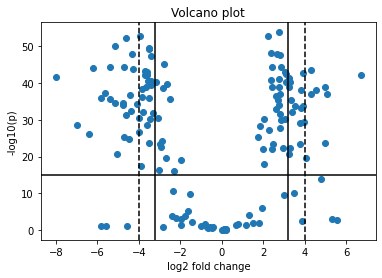

In [41]:
plt.figure()
plt.scatter(fc, logp)
plt.title("Volcano plot")
plt.axhline(y=15, c='k')
plt.axvline(x=3.2, c='k')
plt.axvline(x=-3.2, c='k')
plt.axvline(x=4, c='k', linestyle='--')
plt.axvline(x=-4, c='k', linestyle='--')
plt.xlabel("log2 fold change")
plt.ylabel("-log10(p)")
plt.show()

In [42]:
len(all_genes)

219

In [43]:
fewest_list = list(most_sig_fewest.values())
few_list = list(most_sig_few.values())
sig_115_list = list(most_sig_115.values())

In [44]:
len(fewest_list) 

33

In [45]:
len(few_list)

71

In [46]:
len(sig_115_list)

4

In [47]:
# save selected genes
with open("most_diff_genes_38", "wb") as fp:   #Pickling
    pickle.dump(fewest_list, fp)

In [48]:
# save selected genes
with open("most_diff_genes_60", "wb") as fp:   #Pickling
    pickle.dump(few_list, fp)

In [49]:
# save selected genes
with open("most_diff_genes_115", "wb") as fp:   #Pickling
    pickle.dump(sig_115_list, fp)

## Hierarchical clustering heatmap 
### 119 most differentially expressed genes between CD and control patients
### Includes controls, CD no deep ulcer, CD deep ulcer

In [50]:
all_CD_cols = np.array(select_hundred.columns)
i = 0
for i in range(len(all_CD_cols)):
    print(i,":",all_CD_cols[i])

0 : 1_CD_plain
1 : 2_CD_plain
2 : 3_CD_plain
3 : 4_CD_plain
4 : 5_CD_plain
5 : 6_CD_deep_ulcer
6 : 7_CD_plain
7 : 8_CD_plain
8 : 9_CD_plain
9 : 12_CD_plain
10 : 13_CD_plain
11 : 15_CD_plain
12 : 16_CD_plain
13 : 17_CD_deep_ulcer
14 : 20_control
15 : 21_CD_deep_ulcer
16 : 22_CD_deep_ulcer
17 : 23_CD_deep_ulcer
18 : 24_CD_plain
19 : 25_CD_plain
20 : 27_CD_deep_ulcer
21 : 29_CD_plain
22 : 30_CD_plain
23 : 32_CD_plain
24 : 37_CD_deep_ulcer
25 : 40_CD_plain
26 : 43_CD_plain
27 : 45_CD_plain
28 : 46_CD_deep_ulcer
29 : 47_CD_plain
30 : 48_CD_deep_ulcer
31 : 49_CD_deep_ulcer
32 : 50_CD_deep_ulcer
33 : 51_CD_deep_ulcer
34 : 52_CD_plain
35 : 53_CD_plain
36 : 56_CD_plain
37 : 57_CD_plain
38 : 58_CD_plain
39 : 59_CD_deep_ulcer
40 : 60_CD_plain
41 : 61_CD_plain
42 : 62_CD_deep_ulcer
43 : 63_CD_deep_ulcer
44 : 66_CD_plain
45 : 68_CD_plain
46 : 69_CD_deep_ulcer
47 : 70_CD_deep_ulcer
48 : 71_CD_plain
49 : 73_CD_plain
50 : 74_CD_plain
51 : 75_CD_deep_ulcer
52 : 91_CD_plain
53 : 93_CD_deep_ulcer
54 : 94

C:\Users\shard\anaconda3\envs\mvp4\lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


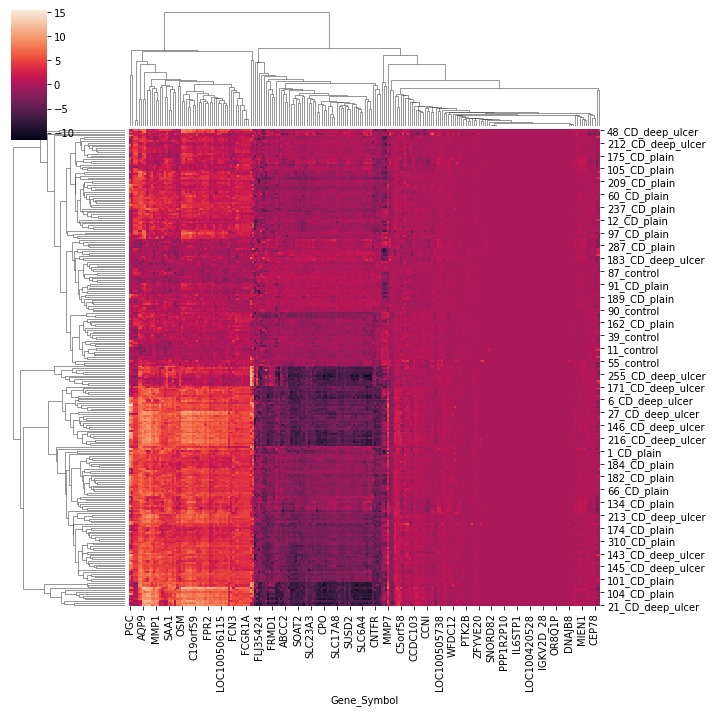

In [51]:
# sns.clustermap(top_genes.T)
# sns.clustermap(top_genes.iloc[:,np.r_[143:168, 221:228]].T)
sns.clustermap(select_hundred.T)
# sns.clustermap(select_hundred.iloc[:20,np.r_[143:168, 221:228]].T)

In [52]:
select_hundred.to_csv('hundred_patients_cd.csv')

In [53]:
select_hundred

,1_CD_plain,2_CD_plain,3_CD_plain,4_CD_plain,5_CD_plain,6_CD_deep_ulcer,7_CD_plain,8_CD_plain,9_CD_plain,12_CD_plain,...,88_control,89_control,90_control,117_control,118_control,121_control,180_control,139_CD_deep_ulcer,237_CD_plain,257_CD_deep_ulcer
Gene_Symbol,,,,,,,,,,,,,,,,,,,,,
AADAC,-0.881250,-8.38590,-3.47650,0.47600,-6.86090,-3.757300,-4.744800,-0.044202,-2.506500,0.006241,...,-1.031600,1.162300,0.199200,0.23903,1.36150,-0.934720,-0.248440,-5.22890,-0.680680,-1.48990
APOA1,-3.046500,-9.36170,-2.63630,0.93493,-6.47840,-5.871500,-9.417700,-0.653090,-4.268600,-0.835050,...,-0.569040,0.744860,0.200140,-0.15932,1.05160,-1.207500,-1.068500,-7.45590,0.396090,-2.94530
APOA4,-0.918130,-7.16960,-2.64860,0.19887,-7.48180,-3.041400,-7.560500,-0.947140,-1.662300,-0.893450,...,-0.829470,0.546240,0.532340,-0.29898,0.26538,-0.071699,-1.206200,-6.29720,0.225200,-1.91980
APOB,-1.312800,-7.41580,-2.54120,1.91080,-7.06560,-3.729600,-6.837700,0.335400,-3.110900,-0.016976,...,-0.000025,1.025300,0.417150,0.14618,1.01690,0.075990,-0.442670,-5.48050,-0.043606,-2.89930
APOC3,-1.277500,-8.08800,-2.16910,0.80647,-7.22960,-3.867300,-8.254200,-0.466340,-1.608800,-0.302970,...,-0.581970,0.590720,0.047763,-0.39229,0.53516,-0.996560,-1.302900,-7.37030,0.002768,-1.89160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RSL24D1P1,0.000000,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.00000,0.000000,0.00000
MIEN1,0.048895,-0.13047,0.16749,-0.26901,-0.43410,-0.001796,-0.642020,0.007044,0.002349,-0.356140,...,0.008968,0.265660,-0.075956,0.00660,0.42261,-0.100730,-0.365170,-0.33844,0.009232,-0.10076
PCBP1_AS1,-1.101700,0.12465,-0.81007,-0.47922,-0.86561,0.011933,-0.019921,0.073880,-0.322260,-0.400690,...,-0.142800,-0.010798,-0.173880,0.38871,0.24453,0.044674,0.055407,-0.23596,-0.090641,-0.53052


### Top 31 most differentially expressed genes between CD and control patients

In [54]:
top_genes_df = select_hundred.loc[fewest_list]
top_genes_df

,1_CD_plain,2_CD_plain,3_CD_plain,4_CD_plain,5_CD_plain,6_CD_deep_ulcer,7_CD_plain,8_CD_plain,9_CD_plain,12_CD_plain,...,88_control,89_control,90_control,117_control,118_control,121_control,180_control,139_CD_deep_ulcer,237_CD_plain,257_CD_deep_ulcer
Gene_Symbol,,,,,,,,,,,,,,,,,,,,,
AADAC,-0.881250,-8.38590,-3.4765,0.476000,-6.86090,-3.757300,-4.74480,-0.044202,-2.50650,0.006241,...,-1.031600,1.162300,0.199200,0.239030,1.361500,-0.934720,-0.24844,-5.2289,-0.680680,-1.4899
APOB,-1.312800,-7.41580,-2.5412,1.910800,-7.06560,-3.729600,-6.83770,0.335400,-3.11090,-0.016976,...,-0.000025,1.025300,0.417150,0.146180,1.016900,0.075990,-0.44267,-5.4805,-0.043606,-2.8993
APOC3,-1.277500,-8.08800,-2.1691,0.806470,-7.22960,-3.867300,-8.25420,-0.466340,-1.60880,-0.302970,...,-0.581970,0.590720,0.047763,-0.392290,0.535160,-0.996560,-1.30290,-7.3703,0.002768,-1.8916
CYP3A4,-3.879200,-9.60300,-2.8813,0.733760,-6.98370,-3.321000,-7.70960,-0.532380,-3.59700,-0.411650,...,0.399810,0.371250,0.115900,-0.007023,0.955210,0.334690,-1.04650,-6.7386,-0.937210,-2.1404
FABP6,0.093754,-7.78160,-4.5377,0.167280,-6.97050,-1.757600,-7.31450,-0.378690,-5.12390,-0.047173,...,-1.571800,0.635130,0.481360,-1.505800,0.242410,-2.327800,0.24639,-6.7982,-1.485600,-2.0896
FPR1,3.278000,6.70300,5.2163,-1.671600,6.09560,4.631800,2.93560,-1.304100,4.30730,-0.097771,...,1.268300,-1.808600,0.426030,-0.282270,-3.265200,1.683100,0.70187,6.1480,2.152300,5.2174
GUCA2B,-3.552300,-9.75800,-4.4011,0.137200,-7.96990,-4.613100,-9.50910,-0.735610,-4.72510,-1.486000,...,-1.055900,1.319800,-0.124950,0.011059,0.911470,-0.388790,-1.38370,-7.6009,-0.707780,-3.7801
IL1RN,2.338500,6.47070,5.2487,-0.622560,6.07440,2.994000,1.73830,-0.366330,2.16450,-0.576700,...,0.930530,0.133040,0.588550,-0.717140,-1.700100,0.953720,0.86707,5.6058,2.635200,5.0666
ITIH3,-3.886400,-2.86420,-3.2887,-5.835900,-2.85370,-2.854400,-1.89870,-3.983100,-2.14630,-2.231800,...,0.492850,-2.635100,-0.073045,-0.416890,-1.683700,-0.531700,0.90955,-2.3814,-2.429500,-3.1007


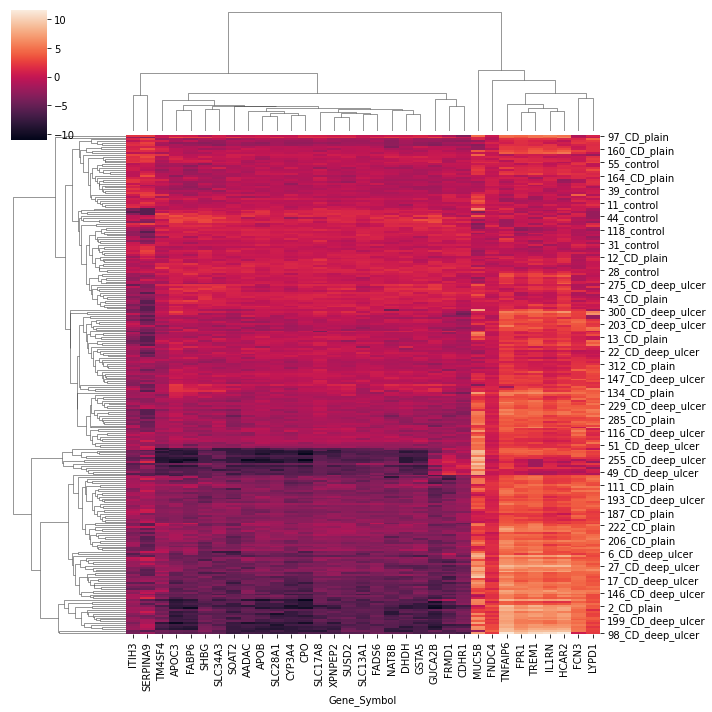

In [55]:
sns.clustermap(top_genes_df.T)

### Example: expression of top 31 genes in 32 control and CD patients

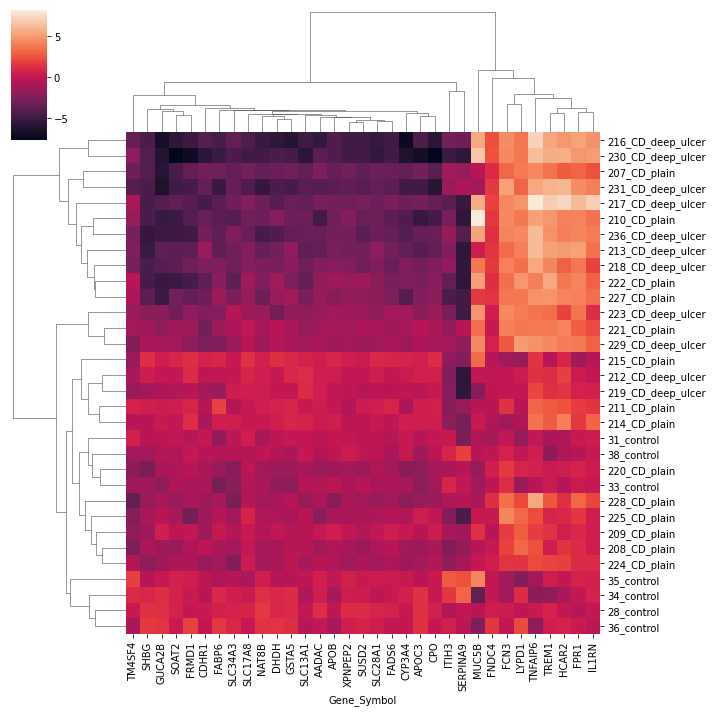

In [56]:
sns.clustermap(top_genes_df.iloc[:,np.r_[143:168, 221:228]].T)

# Ulcerative Collitis analysis

In [57]:
# UC_df = dataset.drop(CD_cols, axis=1)
# UC_df

In [58]:
# select_hundred = UC_df[UC_df.Gene_Symbol.astype(str).isin(dataset.Gene_Symbol.astype(str))]
# select_hundred.pop("Gene_ID")
# select_hundred = select_hundred.set_index("Gene_Symbol")
# # select_hundred = select_hundred[:-1]

### 120 matches with RISK dataset

In [59]:
# select_hundred

## Patient statistics

In [60]:
# select_hundred.describe() 

## Gene statistics

In [61]:
# select_hundred.T.describe()

In [62]:
# with pd.option_context('display.max_rows', None,
#                        'display.max_columns', None,
#                        'display.precision', 3,
#                        ):
#     print(select_hundred)

# select_hundred.head(60)

## Hierarchical clustering heatmap 
### 120 most differentially expressed genes between UC and control patients
### Includes controls and UC patients

In [63]:

# sns.clustermap(select_hundred)

In [64]:
# select_hundred.to_csv('hundred_patients_uc.csv')